<img align="right" src="images/tf-small.png"/>

# Senses

We visualize the distribution of *sense labels* of verb occurrences, where verb occurrences select senses that depend on the number and nature of key constituents in their context.

The verbal sense data has been computed in the 
[flowchart notebook](https://github.com/ETCBC/valence/blob/master/notebooks/flowchart.ipynb).

In this notebook we show how to make use of that data.

For more information about the flowchart computations and the results, 
read the [wiki](https://github.com/ETCBC/valence/wiki/Workflows).

Or go straight to the [legend](https://github.com/ETCBC/valence/wiki/Legend) of the sense labels.

# Results
We have drawn the results of this notebook to the top.

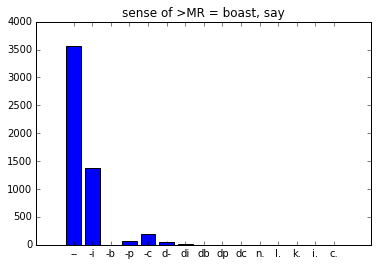

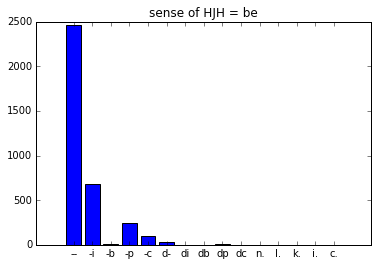

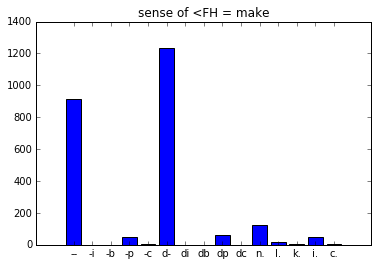

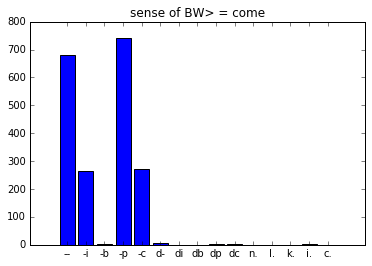

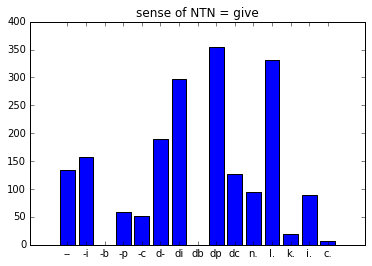

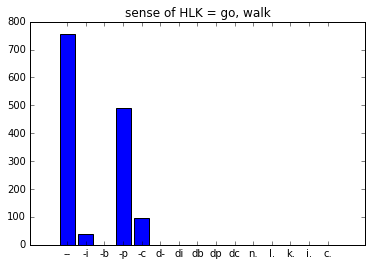

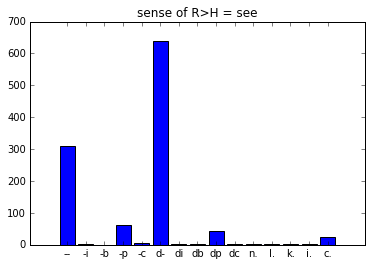

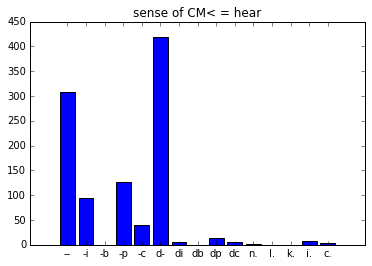

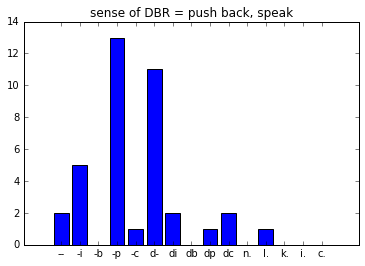

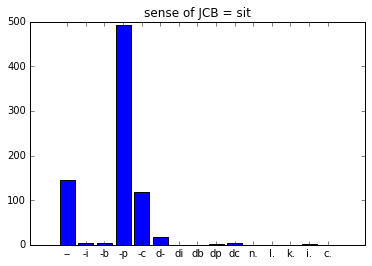

In [51]:
# Run this cell as the last one.
for lex in frequentVerbLexs:
    getSenseDistr(lex)

[legend](https://github.com/ETCBC/valence/wiki/Legend)

## Authors

[Janet Dyk and Dirk Roorda](https://github.com/ETCBC/valence/wiki/Authors)

Last modified 2017-09-14.

## Data
We carry out the valence project against the Hebrew Text Database of the ETCBC, version 4b.
See the description of the [sources](https://github.com/ETCBC/valence/wiki/Sources).

In [1]:
import collections
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

import pandas
pandas.set_option('display.notebook_repr_html', True)
from tf.fabric import Fabric

In [2]:
source = 'etcbc'
version = '4b'

In [3]:
ETCBC = f'hebrew/{source}{version}'
VALENCE = f'tf/{version}'
TF = Fabric(locations=['~/github/text-fabric-data-legacy', '~/github/valence'], modules=[ETCBC, VALENCE])

This is Text-Fabric 2.3.10
Api reference : https://github.com/ETCBC/text-fabric/wiki/Api
Tutorial      : https://github.com/ETCBC/text-fabric/blob/master/docs/tutorial.ipynb
Data sources  : https://github.com/ETCBC/text-fabric-data
Data docs     : https://etcbc.github.io/text-fabric-data
Shebanq docs  : https://shebanq.ancient-data.org/text
Slack team    : https://shebanq.slack.com/signup
Questions? Ask shebanq@ancient-data.org for an invite to Slack
121 features found and 0 ignored


In [20]:
api = TF.load('''
    sp vs
    lex gloss
    freq_lex
    predication sense
    mother
''')
api.makeAvailableIn(globals())

  0.00s loading features ...
   |     0.31s B mother               from /Users/dirk/github/text-fabric-data-legacy/hebrew/etcbc4b
   |     0.00s Feature overview: 115 for nodes; 5 for edges; 1 configs; 7 computed
  0.59s All features loaded/computed - for details use loadLog()


# Overall sense label distribution

Let's start with a distribution of the sense labels themselves.

First collect the data. Here are the sense labels.

In [5]:
senseLabels = sorted({F.sense.v(v) for v in F.otype.s('word')} - {None})
print(' '.join(senseLabels))

-- -b -c -i -p c. d- db dc di dp i. k. l. n.


We adjust the order of the sense labels manually, for clarity of presentation later on.

In [6]:
senseLabels = '-- -i -b -p -c d- di db dp dc n. l. k. i. c.'.split()
print(' '.join(senseLabels))

-- -i -b -p -c d- di db dp dc n. l. k. i. c.


Now we count how many times the labels occur. 

In [7]:
senseCount = collections.Counter()
noSense = []
isPredicate = {'regular', 'copula'}

for v in F.otype.s('word'):
    sense = F.sense.v(v)
    if sense == None:
        # skip words that are not verbs in the qal
        if F.sp.v(v) != 'verb' or F.vs.v(v) != 'qal': continue
        # skip verbs in a phrase that is not a verb phrase, e.g. some participles
        # the criterion here is whether the value of feature `predication` is non trivial
        p = L.u(v, 'phrase')
        if F.predication.v(p) not in isPredicate: continue 
        noSense.append(v)
        continue
    senseCount[sense] +=1
info('Counted {} senses'.format(sum(senseCount.values())))
if noSense:
    error('{} verb occurrences do not have a sense'.format(len(noSense)))
    for v in noSense[0:10]:
        print('{:<20} word {:>6} phrase {:>6} = {:<5}'.format(
            '{} {}:{}'.format(*T.sectionFromNode(v)),
            v,
            L.u(v, 'phrase')[0],
            F.lex.v(v)
        ))
else:
    info('All relevant verbs have been assigned a sense')

    21s Counted 47346 senses
    21s All relevant verbs have been assigned a sense


Show the sense counts.

In [8]:
x = range(len(senseLabels))
s = [senseCount[sl] for sl in senseLabels]
s

[18147, 3490, 52, 6537, 3142, 10299, 744, 44, 1887, 945, 540, 755, 62, 631, 71]

Plot a chart with overall sense counts.

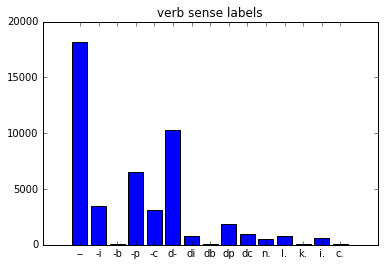

In [9]:
fig = plt.figure()
plt.bar(x, s, tick_label=senseLabels, align='center')
plt.title('verb sense labels')

[legend](https://github.com/ETCBC/valence/wiki/Legend)

# Sense label distribution per verb

We show the sense label distribution for the most frequent verbs.

First we need a function that plots a distribution, given a verb.
The verb is given by its lexeme.

In [10]:
x = range(len(senseLabels))

def getSenseDistr(lex):
    occurrences = [v for v in F.otype.s('word') if F.sense.v(v) and F.lex.v(v).rstrip('[=]') == lex]
    print(len(occurrences))
    gloss = ', '.join(sorted({F.gloss.v(v) for v in occurrences}))
    senseCount = collections.Counter()
    for v in occurrences:
        sense = F.sense.v(v)
        senseCount[sense] +=1
    s = [senseCount[sl] for sl in senseLabels]
    fig = plt.figure()
    plt.bar(x, s, tick_label=senseLabels, align='center')
    plt.title('sense of {} = {}'.format(lex, gloss))

5277


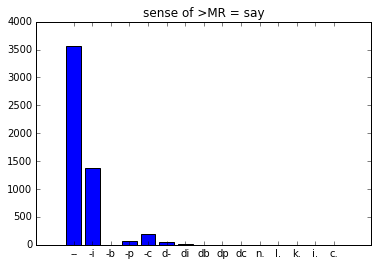

In [11]:
getSenseDistr('>MR')

[legend](https://github.com/ETCBC/valence/wiki/Legend)

38


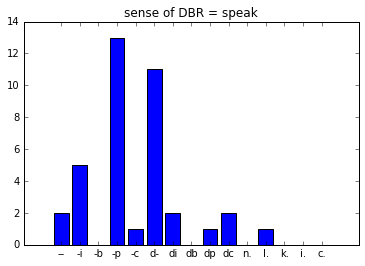

In [12]:
getSenseDistr('DBR')

[legend](https://github.com/ETCBC/valence/wiki/Legend)

# Sense label distribution frequent verbs

We produce the sense label distributions for the 10 most frequent verbs.

In [13]:
frequentVerbNodes = sorted(
    (v for v in F.otype.s('word') if F.sp.v(v) == 'verb' and F.vs.v(v) == 'qal'), 
    key=lambda v: -F.freq_lex.v(v),
)
len(frequentVerbNodes)

50171

In [14]:
frequentVerbLexSet = set()
frequentVerbLexs = []
limit = 10
for v in frequentVerbNodes:
    if len(frequentVerbLexs) == 10: break
    lex = F.lex.v(v).rstrip('[=]')
    if lex in frequentVerbLexSet: continue
    frequentVerbLexSet.add(lex)
    frequentVerbLexs.append(lex)
frequentVerbLexs

['>MR', 'HJH', '<FH', 'BW>', 'NTN', 'HLK', 'R>H', 'CM<', 'DBR', 'JCB']

## What's the matter with DBR?

DBR is a frequent verb, why do we see so few sense assignments?
That's easy: we do only the `qal` stems, and DBR is strong in `piel`s and weak in `qal`s:

In [15]:
dbr = [v for v in F.sp.s('verb') if F.lex.v(v) == 'DBR[']
dbrByStem = collections.Counter()
for v in dbr: dbrByStem[F.vs.v(v)] += 1
    
print('''
Frequency of the verb DBR: {:>4}
# Qal forms:               {:>4}
# Piel forms:              {:>4}
'''.format(
    F.freq_lex.v(dbr[0]),
    dbrByStem['qal'],
    dbrByStem['piel'],
))


Frequency of the verb DBR: 1138
# Qal forms:                 41
# Piel forms:              1089



# What's the matter with >MR?
*to speak* is a transitive verb, you would expect lots of occurrences with a direct object, so senses
`d-`, `di`, `db`, `dp`, `dc`.
Instead, we see an overwhelming number of `--`.
Why is that?

Im many cases, this verbs introduces direct speech.
The direct speech could be regarded as the direct object of `>MR` in those cases.
But the creators of the database have encoded the direct speech as separate sentences, hence our algorithm does not
detect these kinds of direct objects.

Let us have a look at a specific case, the clause starting with word 35.

In [22]:
wn = 35
cn = L.u(wn, 'clause')[0]
sn = L.u(wn, 'sentence')[0]
vn = L.u(wn, 'verse')[0]
directSpeech = T.text(L.d(cn, 'word'))
sentence = T.text(L.d(sn, 'word'))
wholeVerse = T.text(L.d(vn, 'word'))
print('Consider clause {} in sentence {} in verse {}'.format(directSpeech, sentence, wholeVerse))

Consider clause יְהִ֣י אֹ֑ור  in sentence יְהִ֣י אֹ֑ור  in verse וַיֹּ֥אמֶר אֱלֹהִ֖ים יְהִ֣י אֹ֑ור וַֽיְהִי־אֹֽור׃



It might be handy to have a look at
[this verse on SHEBANQ](https://shebanq.ancient-data.org/hebrew/text?qactive=hlcustom&qsel_one=white&qpub=x&qget=v&wactive=hlcustom&wsel_one=black&wpub=x&wget=v&nactive=hlcustom&nsel_one=black&npub=x&nget=v&chapter=1&lang=en&book=Genesis&qw=n&tr=hb&tp=txt_tb1&iid=Mnx2YWxlbmNl&verse=3&version=4b&mr=m&page=2&c_q1510=turquoise&c_w1BRAv=yellow&wd4_statfl=v&ph_arela=v&wd4_statrl=v&sn_an=x&cl=v&wd1_lang=x&wd1_subpos=x&wd2_person=v&sp_rela=v&wd1_pdp=x&sn_n=v&wd3_uvf=x&ph_fun=v&wd1_nmtp=x&gl=x&sp_n=v&pt=x&ph_an=v&ph_typ=x&cl_typ=x&tt=x&wd4_statro=x&wd3_vbs=x&wd1=v&tl=x&wd3=x&wd4=x&wd2_gender=v&ph=x&wd3_vbe=v&wd1_pos=x&ph_det=v&ph_rela=x&wd4_statfo=x&tl_tlv=x&wd2_stem=v&wd2_state=v&ht=v&ph_n=v&tl_tlc=x&cl_tab=x&wd3_nme=x&hl=x&cl_par=x&cl_an=x&cl_n=v&wd3_prs=v&wd3_pfm=x&sp=x&cl_code=x&ht_hk=x&wd2=x&hl_hlc=x&cl_rela=x&wd2_gnumber=v&wd2_tense=v&cl_txt=x&wd1_n=v&sn=v&ht_ht=v&hl_hlv=v&pref=alt).
After loading the page, click on the verse number 3 to see it with some underlying data in view, in this case the word, clause and sentence numbers.

The question is now, is there a link from this clause to the preceding וַיֹּ֥אמֶר ?

Let's ask for the mother of this clause, or its enclosing sentence.

In [23]:
print('Mother of clause: {}; mother of sentence: {}.'.format(
    E.mother.f(cn),
    E.mother.f(sn),
))

Mother of clause: (); mother of sentence: ().


Nope. I do not see an encoded link between the direct speech and the verb introducing it.
It could be that I'm looking in the wrong direction.